In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  

In [14]:


def calculate_money_flow(tickers, period='5d', interval='1d'):
    """
    Calculate the money flow for a list of stocks using yfinance.
    
    Parameters:
        tickers (list): List of stock symbols.
        period (str): Time period to fetch data for (default: '5d').
        interval (str): Data interval (default: '1d').
    
    Returns:
        DataFrame: A DataFrame containing the money flow for each stock.
    """
    # Download data for all tickers at once
    data = yf.download(tickers, period=period, interval=interval)
    results = []
    
    # Loop over each ticker to process its data individually
    for ticker in tickers:
        # Check if the data has a MultiIndex (as is the case when downloading multiple tickers)
        if isinstance(data.columns, pd.MultiIndex):
            # Extract data for this ticker using the .xs method.
            # The MultiIndex is organized with attributes as level 0 and ticker symbols as level 1.
            ticker_data = data.xs(ticker, axis=1, level=1)
        else:
            ticker_data = data.copy()
        
        # Verify required columns exist
        required_columns = ['High', 'Low', 'Close', 'Volume']
        for col in required_columns:
            if col not in ticker_data.columns:
                raise KeyError(f"Missing expected column: {col} for ticker: {ticker}")
        
        # Calculate Typical Price
        ticker_data['Typical Price'] = (ticker_data['High'] + ticker_data['Low'] + ticker_data['Close']) / 3
        
        # Calculate Money Flow
        ticker_data['Money Flow'] = ticker_data['Typical Price'] * ticker_data['Volume']
        
        # Add the ticker as a column for identification
        ticker_data['Ticker'] = ticker
        
        # Append the results for this ticker (reset index to make Date a column)
        results.append(ticker_data[['Ticker', 'Money Flow']].reset_index())
    
    # Combine all individual ticker results into one DataFrame
    result_df = pd.concat(results, ignore_index=True)
    return result_df




In [15]:
tickers = ['AAPL', 'MSFT', 'TSLA','GOOGL',"AMZN"]
money_flow_data = calculate_money_flow(tickers)
print(money_flow_data)

[*********************100%***********************]  5 of 5 completed

Price       Date Ticker    Money Flow
0     2025-02-28   AAPL  1.352881e+10
1     2025-03-03   AAPL  1.129538e+10
2     2025-03-04   AAPL  1.274441e+10
3     2025-03-05   AAPL  1.103744e+10
4     2025-03-06   AAPL  4.943230e+09
5     2025-02-28   MSFT  1.293234e+10
6     2025-03-03   MSFT  8.999615e+09
7     2025-03-04   MSFT  1.136734e+10
8     2025-03-05   MSFT  9.298466e+09
9     2025-03-06   MSFT  4.091235e+09
10    2025-02-28   TSLA  3.318421e+10
11    2025-03-03   TSLA  3.335160e+10
12    2025-03-04   TSLA  3.455838e+10
13    2025-03-05   TSLA  2.584143e+10
14    2025-03-06   TSLA  1.584693e+10
15    2025-02-28  GOOGL  8.144660e+09
16    2025-03-03  GOOGL  6.880837e+09
17    2025-03-04  GOOGL  7.716111e+09
18    2025-03-05  GOOGL  5.317708e+09
19    2025-03-06  GOOGL  2.535672e+09
20    2025-02-28   AMZN  1.090467e+10
21    2025-03-03   AMZN  8.898622e+09
22    2025-03-04   AMZN  1.233350e+10
23    2025-03-05   AMZN  7.992761e+09
24    2025-03-06   AMZN  4.326166e+09



/var/folders/39/953q32fx2pgd35pdr0s2p0r00000gn/T/ipykernel_57452/1239526293.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Typical Price'] = (ticker_data['High'] + ticker_data['Low'] + ticker_data['Close']) / 3
/var/folders/39/953q32fx2pgd35pdr0s2p0r00000gn/T/ipykernel_57452/1239526293.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Money Flow'] = ticker_data['Typical Price'] * ticker_data['Volume']
/var/folders/39/953q32fx2pgd35pdr0s2p0r00000gn/T/ipykernel_57452/123952

In [16]:
# Pivot the data: Rows -> Date, Columns -> Tickers, Values -> Money Flow
heatmap_data = money_flow_data.pivot(index='Date', columns='Ticker', values='Money Flow')

# Ensure data is structured properly
print(heatmap_data.head())


Ticker              AAPL          AMZN         GOOGL          MSFT  \
Date                                                                 
2025-02-28  1.352881e+10  1.090467e+10  8.144660e+09  1.293234e+10   
2025-03-03  1.129538e+10  8.898622e+09  6.880837e+09  8.999615e+09   
2025-03-04  1.274441e+10  1.233350e+10  7.716111e+09  1.136734e+10   
2025-03-05  1.103744e+10  7.992761e+09  5.317708e+09  9.298466e+09   
2025-03-06  4.943230e+09  4.326166e+09  2.535672e+09  4.091235e+09   

Ticker              TSLA  
Date                      
2025-02-28  3.318421e+10  
2025-03-03  3.335160e+10  
2025-03-04  3.455838e+10  
2025-03-05  2.584143e+10  
2025-03-06  1.584693e+10  


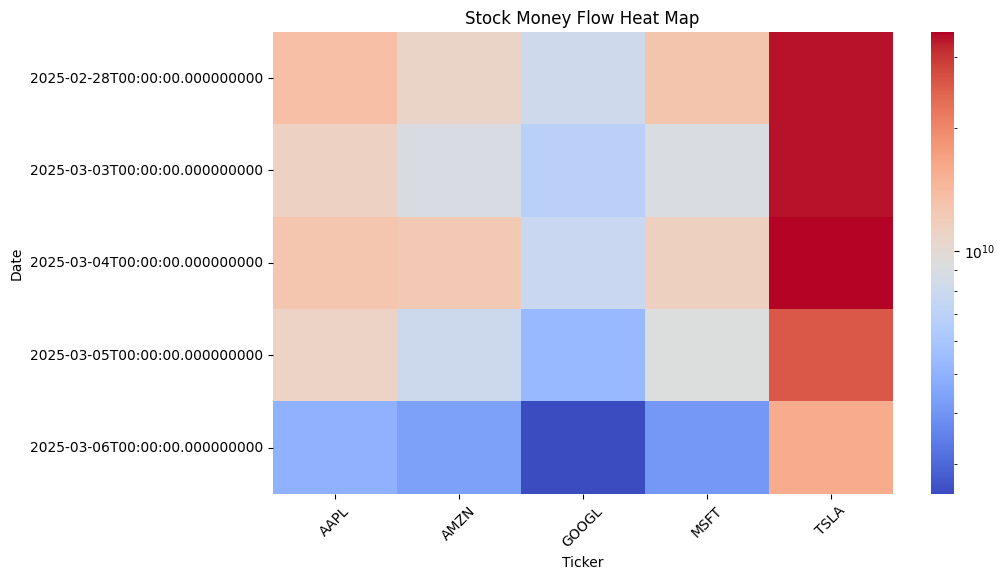

In [20]:
# Set plot size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', norm=mcolors.LogNorm())

# Add title
plt.title("Stock Money Flow Heat Map")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()
